In [111]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
# I used code from https://dkfk2747.tistory.com/18 to download MNIST
sys.path.append("./dataset")
from dataset.mnist import load_mnist
import matplotlib.pylab as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [10]:
(train_image_data, train_label_data), (test_image_data, test_label_data) = load_mnist(flatten = True, normalize = True)

In [11]:
train_label_data.shape

(60000,)

In [12]:
train_image_data.shape

(60000, 784)

In [13]:
train_image_data=torch.tensor(train_image_data)
train_label_data=torch.tensor(train_label_data)
test_image_data=torch.tensor(test_image_data)
test_label_data=torch.tensor(test_label_data)

# 1-1

In [14]:
train_dataset=TensorDataset(train_image_data, train_label_data)
train_dataloader=DataLoader(train_dataset,batch_size=32)
test_dataset=TensorDataset(test_image_data, test_label_data)
test_dataloader=DataLoader(test_dataset,batch_size=32)

In [32]:
train_image_data.shape

torch.Size([60000, 784])

In [16]:
class SingleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.output = nn.Linear(784, 10)
        self.softmax=nn.Softmax(dim=1)
    def forward(self, x):
        x=self.output(x)
        x=self.softmax(x)
        return x

In [35]:
model=SingleNN()
model(train_image_data)[0]

tensor([0.1121, 0.0740, 0.1124, 0.0992, 0.1154, 0.0878, 0.0935, 0.1247, 0.0853,
        0.0957], grad_fn=<SelectBackward0>)

In [154]:
def model_learning(model, lr):
    optimizer=torch.optim.Adam(model.parameters(),lr=lr)
    criterion=nn.CrossEntropyLoss()
    loss_list=[]
    train_loss=0
    converge=False
    for epoch in range(100):
        if epoch%20==19:
            print(f'{epoch+1} th epoch, loss : {train_loss}')
        epoch_loss=0
        for batch in train_dataloader:
            b_input=batch[0]
            b_labels=batch[1]
            prediction=model(b_input)
            loss=criterion(prediction,b_labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss+=loss.item()
        if train_loss and not converge and  abs(train_loss-epoch_loss/len(train_dataloader)) < 1e-4:
            print(f'training converges at {epoch}th epoch')
            converge = True
        train_loss=epoch_loss/len(train_dataloader)
        loss_list.append(train_loss) 
    return loss_list

In [37]:
def model_eval(model,data,label):
    prediction=torch.argmax(model(data),dim=1)
    return ((prediction==label).sum()/label.shape[0]).item()

In [61]:
def learning_and_test(model,lr):
    train_loss = model_learning(model,lr=lr)
    train_accuracy = model_eval(model, train_image_data, train_label_data)
    test_accuracy = model_eval(model, test_image_data, test_label_data)
    print(f'train accuracy is {train_accuracy*100:.2f}% and test accuracy is {test_accuracy*100:.2f}%.')
    x=[i for i in range(100)]
    plt.plot(x,train_loss)
    plt.xlabel('epoch')
    plt.ylabel('train loss')
    plt.title(f'LR is {lr}')
    plt.show()

20 th epoch, loss : 1.6198814093271892
training converges at 21th epoch
40 th epoch, loss : 1.6181298844019572
60 th epoch, loss : 1.609229472287496
80 th epoch, loss : 1.6134851364135743
100 th epoch, loss : 1.6099454719543458
train accuracy is 85.54% and test accuracy is 85.53%.


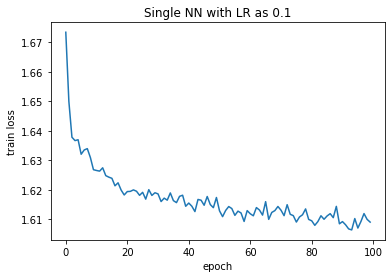

In [55]:
model=SingleNN()
train_loss=learning_and_test(model,0.1)

20 th epoch, loss : 1.5277004240036012
40 th epoch, loss : 1.5203170115788778
60 th epoch, loss : 1.5166096066792807
80 th epoch, loss : 1.51419474512736
training converges at 84th epoch
100 th epoch, loss : 1.512343491236369
train accuracy is 95.20% and test accuracy is 93.30%.


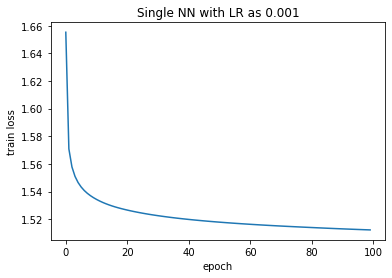

In [56]:
model=SingleNN()
train_loss=learning_and_test(model,0.001)

# 1-2

In [57]:
class OneHiddenNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden=nn.Linear(784,128)
        self.sigmoid=nn.Sigmoid()
        self.output = nn.Linear(128, 10)
        self.softmax=nn.Softmax(dim=1)
    def forward(self, x):
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)
        return x

20 th epoch, loss : 1.4830406173070272
training converges at 26th epoch
40 th epoch, loss : 1.47412579498291
60 th epoch, loss : 1.471460464032491
80 th epoch, loss : 1.4703192941029866
100 th epoch, loss : 1.4690947193145751
train accuracy is 99.22% and test accuracy is 96.45%.


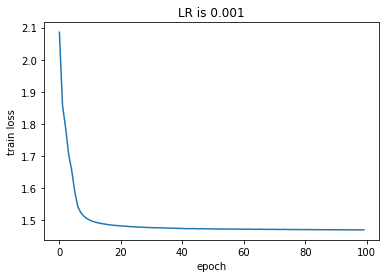

In [62]:
model=OneHiddenNN()
train_loss=learning_and_test(model,0.001)

# 1-3

In [63]:
class TwoHiddenNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden=nn.Linear(784,128)
        self.hidden2=nn.Linear(128,4)
        self.sigmoid=nn.Sigmoid()
        self.output = nn.Linear(4, 10)
        self.softmax=nn.Softmax(dim=1)
    def forward(self, x):
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.hidden2(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)
        return x

20 th epoch, loss : 1.4805364027659098
training converges at 33th epoch
40 th epoch, loss : 1.4725820824305216
60 th epoch, loss : 1.470524633471171
80 th epoch, loss : 1.4690937041600545
100 th epoch, loss : 1.468496199798584
train accuracy is 99.31% and test accuracy is 96.62%.


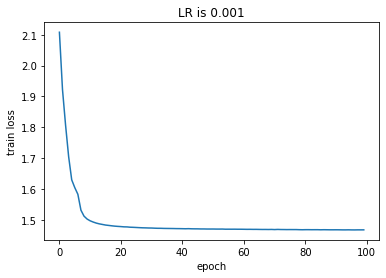

In [155]:
model=TwoHiddenNN()
train_loss=learning_and_test(model,0.001)

# 1-4

In [156]:
# get hook for hidden_layer. 
# refer to https://discuss.pytorch.org/t/how-can-l-load-my-best-model-as-a-feature-extractor-evaluator/17254/6
activation = {}
sigmoid=nn.Sigmoid()
def get_activation(name):
    def hook(model, input, output):
        x=output.detach()
        x=sigmoid(x)
        activation[name] = x
    return hook

In [157]:
model.hidden2.register_forward_hook(get_activation('hidden2'))

In [158]:
classified_label=torch.argmax(model(test_image_data), dim=1)
for label in range(10):
    print(activation['hidden2'][classified_label==label].mean(dim=0).tolist())

[0.0043839868158102036, 0.9903299808502197, 0.016124678775668144, 0.004764708690345287]
[0.9932803511619568, 0.966691792011261, 0.0035430151037871838, 0.9816293120384216]
[0.021513573825359344, 0.011254880577325821, 0.01678401418030262, 0.9918839931488037]
[0.009376324713230133, 0.9745294451713562, 0.01178728323429823, 0.984724223613739]
[0.9916654229164124, 0.016464801505208015, 0.020856665447354317, 0.014079381711781025]
[0.01459670439362526, 0.9382526874542236, 0.9692460298538208, 0.9364387392997742]
[0.012872716411948204, 0.013420525006949902, 0.9856342077255249, 0.015731237828731537]
[0.9859369993209839, 0.04839769005775452, 0.9787715673446655, 0.9882807731628418]
[0.01461405772715807, 0.042109739035367966, 0.018911441788077354, 0.0326530858874321]
[0.9643762707710266, 0.9396374225616455, 0.8673659563064575, 0.032871831208467484]


# 1-5

In [160]:
class TwoHiddenNN2(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden=nn.Linear(784,128)
        self.hidden2=nn.Linear(128,2)
        self.sigmoid=nn.Sigmoid()
        self.output = nn.Linear(2, 10)
        self.softmax=nn.Softmax(dim=1)
    def forward(self, x):
        x=self.hidden(x)
        x=self.sigmoid(x)
        x=self.hidden2(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)
        return x

20 th epoch, loss : 1.613787408955892
40 th epoch, loss : 1.522663089052836
60 th epoch, loss : 1.4831090999603271
training converges at 63th epoch
80 th epoch, loss : 1.4779690722783407
100 th epoch, loss : 1.4755960181554157
train accuracy is 98.69% and test accuracy is 94.23%.


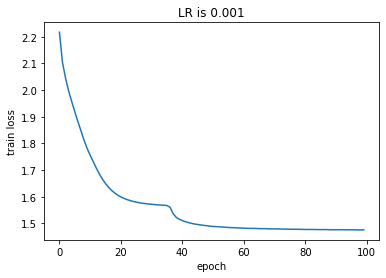

In [164]:
model=TwoHiddenNN2()
train_loss=learning_and_test(model,0.001)

# 1-6

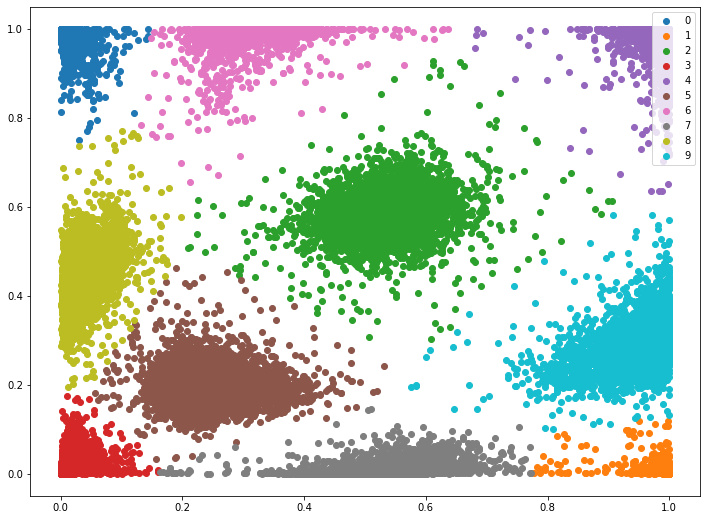

In [165]:
model.hidden2.register_forward_hook(get_activation('hidden2'))
classified_label=torch.argmax(model(train_image_data), dim=1)
plt.figure(figsize=(12,9))
for i in range(10):
    data=activation['hidden2'][classified_label==i]
    plt.scatter(data[:,0],data[:,1],label=i)
plt.legend(loc='upper right')